In [1]:
import xml.etree.ElementTree as ET

def load_xml_annotations(filename):
    tree = ET.parse(filename)
    root = tree.getroot()
    annotations = []

    for member in root.findall('.//object'):
        bndbox = member.find('bndbox')
        details = {
            'label': member.find('name').text,
            'xmin': int(bndbox.find('xmin').text),
            'ymin': int(bndbox.find('ymin').text),
            'xmax': int(bndbox.find('xmax').text),
            'ymax': int(bndbox.find('ymax').text)
        }
        annotations.append(details)

    return annotations

# Example usage:
annotations = load_xml_annotations('../../data/annots/00001.xml')
print(annotations)


[{'label': 'disease', 'xmin': 58, 'ymin': 23, 'xmax': 310, 'ymax': 165}, {'label': 'disease', 'xmin': 162, 'ymin': 103, 'xmax': 181, 'ymax': 117}]


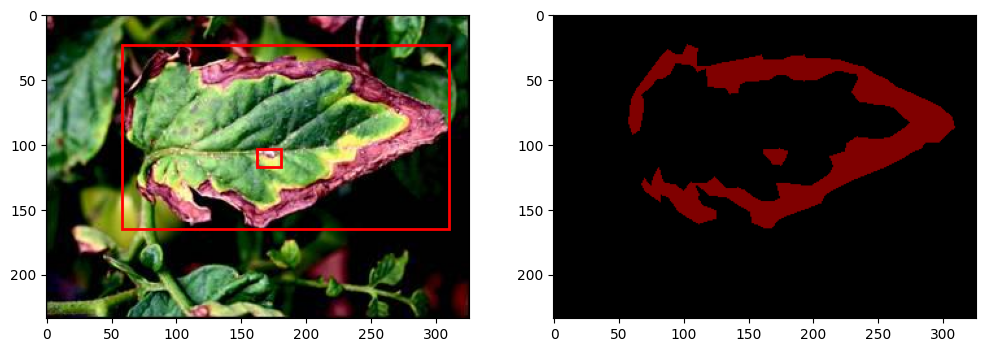

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage.io

def display_image_mask_annotations(image_path, mask_path, annotations):
    image = skimage.io.imread(image_path)
    mask = skimage.io.imread(mask_path)
    
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(image)
    ax[1].imshow(mask, cmap='gray')
    
    for ann in annotations:
        rect = patches.Rectangle((ann['xmin'], ann['ymin']), ann['xmax'] - ann['xmin'], ann['ymax'] - ann['ymin'], linewidth=2, edgecolor='r', facecolor='none')
        ax[0].add_patch(rect)
    
    plt.show()

# Example usage:
display_image_mask_annotations('../../data/images/00001.jpg', '../../data/masks/00001.png', annotations)
